In [1]:
# import Pkg
# Pkg.add("Colors")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %Fetching: [===========>                             ]  27.2 %Fetching: [=============>                           ]  31.9 %Fetching: [====================>                    ]  48.3 %Fetching: [=============================>           ]  71.0 %Fetching: [===================================>     ]  85.2 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [5ae59095] + Colors v0.12.8
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [180]:
using CSV
using DataFrames
using Gadfly
using Statistics
using HypothesisTests
using DataFramesMeta
using Cairo
using Fontconfig

┌ Info: Precompiling Fontconfig [186bb1d3-e1f7-5a2c-a377-96d770f13627]
└ @ Base loading.jl:1260


In [19]:
elephant_df = CSV.read("results_complete/seq/elephant.csv",DataFrame, header=["image_size", "alloc_write_time", "compute_time", "full_time"])
first(elephant_df,6)

,image_size,alloc_write_time,compute_time,full_time
,Int64,Float64,Float64,Float64
1,16,0.000134,0.00027,0.000404
2,16,0.00012,0.000269,0.00039
3,16,8.8e-5,0.000278,0.000365
4,16,0.000122,0.000278,0.0004
5,16,9.6e-5,0.000277,0.000373
6,16,9.8e-5,0.000278,0.000376


In [20]:
print("Loaded")

Loaded

In [21]:
nrow(elephant_df)

100

In [188]:
function confidenceInterval(x)
    confint(OneSampleTTest(x))
end

confidenceInterval (generic function with 1 method)

In [26]:
elephant_mean_df = combine(groupby(elephant_df,:image_size), 
    :alloc_write_time => mean => :alloc_write_time,
    :compute_time => mean => :compute_time,
    :full_time => mean => :full_time,
    :alloc_write_time => conf_int => :alloc_write_confint,
    :compute_time => conf_int => :compute_confint,
    :full_time => conf_int => :full_confint)

,image_size,alloc_write_time,compute_time,full_time,alloc_write_confint
,Int64,Float64,Float64,Float64,Tuple…
1,16,0.0001099,0.0002777,0.0003874,"(9.83286e-5, 0.000121471)"
2,32,0.0001533,0.0010965,0.0012498,"(0.00013652, 0.00017008)"
3,64,0.0003848,0.0041947,0.0045795,"(0.000335778, 0.000433822)"
4,128,0.0009802,0.0165167,0.0174971,"(0.000949282, 0.00101112)"
5,256,0.0032883,0.0655009,0.0687895,"(0.00317726, 0.00339934)"
6,512,0.0135126,0.261124,0.274637,"(0.012154, 0.0148712)"
7,1024,0.051013,1.0501,1.10112,"(0.0489941, 0.0530319)"
8,2048,0.226722,4.13675,4.36347,"(0.209466, 0.243978)"
9,4096,0.812232,16.7516,17.5639,"(0.790391, 0.834073)"


In [53]:
elephant_mean_df[!,:image_size] = string.(collect(elephant_mean_df[!,:image_size]))

10-element Array{String,1}:
 "16"
 "32"
 "64"
 "128"
 "256"
 "512"
 "1024"
 "2048"
 "4096"
 "8192"

In [288]:
min_max_interval = collect(zip(elephant_mean_df[!,:full_confint]...))

2-element Array{NTuple{10,Float64},1}:
 (0.0003751564553067609, 0.0012235100524507236, 0.004460543007794863, 0.017175840504520964, 0.06733483947258212, 0.2702460312423677, 1.078291809728761, 4.291935728418917, 17.193948376575246, 69.85421507781126)
 (0.00039964354469323906, 0.0012760899475492767, 0.004698456992205138, 0.01781835949547904, 0.07024416052741789, 0.27902696875763233, 1.1239419902712386, 4.4350012715810845, 17.93378282342476, 76.66011912218872)

In [296]:
min_interval, max_interval = collect(min_max_interval[1]),collect(min_max_interval[2])

([0.0003751564553067609, 0.0012235100524507236, 0.004460543007794863, 0.017175840504520964, 0.06733483947258212, 0.2702460312423677, 1.078291809728761, 4.291935728418917, 17.193948376575246, 69.85421507781126], [0.00039964354469323906, 0.0012760899475492767, 0.004698456992205138, 0.01781835949547904, 0.07024416052741789, 0.27902696875763233, 1.1239419902712386, 4.4350012715810845, 17.93378282342476, 76.66011912218872])

In [297]:
min_interval

10-element Array{Float64,1}:
  0.0003751564553067609
  0.0012235100524507236
  0.004460543007794863
  0.017175840504520964
  0.06733483947258212
  0.2702460312423677
  1.078291809728761
  4.291935728418917
 17.193948376575246
 69.85421507781126

In [298]:
max_interval

10-element Array{Float64,1}:
  0.00039964354469323906
  0.0012760899475492767
  0.004698456992205138
  0.01781835949547904
  0.07024416052741789
  0.27902696875763233
  1.1239419902712386
  4.4350012715810845
 17.93378282342476
 76.66011912218872

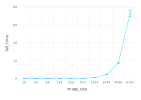

In [300]:
Gadfly.plot(elephant_mean_df,x=:image_size,y=:full_time,ymin=collect(min_max_interval[1]),ymax=collect(min_max_interval[2]),Geom.line,Geom.errorbar)#,Scale.y_log10,Scale.x_log2) #Coord.Cartesian(ymin=10^-5)

In [82]:
last(elephant_mean_df,6)

,image_size,alloc_write_time,compute_time,full_time,alloc_write_confint
,String,Float64,Float64,Float64,Tuple…
1,256,0.0032883,0.0655009,0.0687895,"(0.00317726, 0.00339934)"
2,512,0.0135126,0.261124,0.274637,"(0.012154, 0.0148712)"
3,1024,0.051013,1.0501,1.10112,"(0.0489941, 0.0530319)"
4,2048,0.226722,4.13675,4.36347,"(0.209466, 0.243978)"
5,4096,0.812232,16.7516,17.5639,"(0.790391, 0.834073)"
6,8192,3.43499,69.8222,73.2572,"(3.23168, 3.63829)"


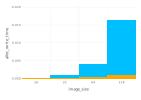

In [86]:
Gadfly.plot(first(elephant_mean_df,4),
    layer(x=:image_size,y=:alloc_write_time,Geom.bar,Theme(default_color=colorant"orange")),
    layer(x=:image_size,y=:compute_time,Geom.bar))

In [95]:
function changeColumnToString(x)
    string.(collect(x))
end

changeColumnToString (generic function with 1 method)

In [165]:
function groupParallelBySizeThread(par_df,region)
    par_m_df = combine(groupby(par_df,[:image_size,:n_threads]), 
        :compute_time => mean => :compute_time,
        :compute_time => confidenceInterval => :compute_confint)
    par_m_df[!,:image_size] = changeColumnToString(par_m_df[!,:image_size])
    par_m_df[!,:n_threads] = changeColumnToString(par_m_df[!,:n_threads])
    par_m_df[!,:region] .= region
    return par_m_df
end

groupParallelBySizeThread (generic function with 2 methods)

In [191]:
function groupSequentialByImageSize(seq_df,region)
    seq_m_df = combine(groupby(seq_df,:image_size), 
    :alloc_write_time => mean => :alloc_write_time,
    :compute_time => mean => :compute_time,
    :full_time => mean => :full_time,
    :alloc_write_time => confidenceInterval => :alloc_write_confint,
    :compute_time => confidenceInterval => :compute_confint,
    :full_time => confidenceInterval => :full_confint)
    seq_m_df[!,:image_size] = changeColumnToString(seq_m_df[!,:image_size])
    seq_m_df[!,:region] .= region
    return seq_m_df
end

groupSequentialByImageSize (generic function with 1 method)

In [197]:
seq_full_df = CSV.read("results_complete/seq/full.csv",DataFrame, header=["image_size", "alloc_write_time", "compute_time", "full_time"])
seq_full_df = groupSequentialByImageSize(seq_full_df,"Full")
seq_elephant_df = CSV.read("results_complete/seq/elephant.csv",DataFrame, header=["image_size", "alloc_write_time", "compute_time", "full_time"])
seq_elephant_df = groupSequentialByImageSize(seq_elephant_df,"Elephant")
seq_seahorse_df = CSV.read("results_complete/seq/seahorse.csv",DataFrame, header=["image_size", "alloc_write_time", "compute_time", "full_time"])
seq_seahorse_df = groupSequentialByImageSize(seq_seahorse_df,"Seahorse")
seq_triple_spiral_df = CSV.read("results_complete/seq/triple_spiral.csv",DataFrame, header=["image_size", "alloc_write_time", "compute_time", "full_time"])
seq_triple_spiral_df = groupSequentialByImageSize(seq_triple_spiral_df,"Triple Spiral")

,image_size,alloc_write_time,compute_time,full_time,alloc_write_confint
,String,Float64,Float64,Float64,Tuple…
1,16,0.0001166,0.0003379,0.0004546,"(9.48284e-5, 0.000138372)"
2,32,0.0001645,0.0013123,0.0014766,"(0.000145531, 0.000183469)"
3,64,0.0003406,0.0050077,0.0053484,"(0.000312416, 0.000368784)"
4,128,0.0009819,0.0196715,0.0206534,"(0.000921942, 0.00104186)"
5,256,0.0033115,0.0785145,0.081826,"(0.00321479, 0.00340821)"
6,512,0.0130322,0.314402,0.327434,"(0.0121218, 0.0139426)"
7,1024,0.05256,1.25743,1.30999,"(0.0483654, 0.0567546)"
8,2048,0.229449,5.03095,5.26039,"(0.210612, 0.248285)"
9,4096,0.835106,20.1811,21.0162,"(0.80394, 0.866272)"


In [169]:
seq_full_df = CSV.read("results_complete/seq/full.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
seq_full_df = groupSequentialByImageSize(seq_full_df,"Full")
seq_elephant_df = CSV.read("results_complete/seq/elephant.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
seq_elephant_df = groupSequentialByImageSize(seq_elephant_df,"Elephant")
seq_seahorse_df = CSV.read("results_complete/seq/seahorse.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
seq_seahorse_df = groupSequentialByImageSize(seq_seahorse_df,"Seahorse")
seq_triple_spiral_df = CSV.read("results_complete/seq/triple_spiral.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
seq_triple_spiral_df = groupSequentialByImageSize(seq_triple_spiral_df,"Triple Spiral")


omp_full_df = CSV.read("results_complete/omp/full.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
omp_full_df = groupParallelBySizeThread(omp_full_df,"Full")
omp_elephant_df = CSV.read("results_complete/omp/elephant.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
omp_elephant_df = groupParallelBySizeThread(omp_elephant_df,"Elephant")
omp_seahorse_df = CSV.read("results_complete/omp/seahorse.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
omp_seahorse_df = groupParallelBySizeThread(omp_seahorse_df,"Seahorse")
omp_triple_spiral_df = CSV.read("results_complete/omp/triple_spiral.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
omp_triple_spiral_df = groupParallelBySizeThread(omp_triple_spiral_df,"Triple Spiral")

pth_full_df = CSV.read("results_complete/pth/full.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
pth_full_df = groupParallelBySizeThread(pth_full_df,"Full")
pth_elephant_df = CSV.read("results_complete/pth/elephant.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
pth_elephant_df = groupParallelBySizeThread(pth_elephant_df,"Elephant")
pth_seahorse_df = CSV.read("results_complete/pth/seahorse.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
pth_seahorse_df = groupParallelBySizeThread(pth_seahorse_df,"Seahorse")
pth_triple_spiral_df = CSV.read("results_complete/pth/triple_spiral.csv",DataFrame, header=["image_size", "compute_time", "n_threads"])
pth_triple_spiral_df = groupParallelBySizeThread(pth_triple_spiral_df,"Triple Spiral")
print("Loaded")

Loaded

In [170]:
omp_triple_spiral_df

,image_size,n_threads,compute_time,compute_confint,region
,String,String,Float64,Tuple…,String
1,16,1,0.0003451,"(0.000319477, 0.000370723)",Triple Spiral
2,16,2,0.0002233,"(0.000210997, 0.000235603)",Triple Spiral
3,16,4,0.0002664,"(1.32766e-5, 0.000519523)",Triple Spiral
4,16,8,0.0001389,"(0.000113292, 0.000164508)",Triple Spiral
5,16,16,0.0066387,"(0.00277225, 0.0105051)",Triple Spiral
6,16,32,0.0006484,"(0.000572733, 0.000724067)",Triple Spiral
7,32,1,0.0013115,"(0.00130246, 0.00132054)",Triple Spiral
8,32,2,0.0007811,"(0.000749131, 0.000813069)",Triple Spiral
9,32,4,0.0004467,"(0.000420668, 0.000472732)",Triple Spiral


In [142]:
@where(omp_full_df, :n_threads .== "32")

,image_size,n_threads,compute_time,compute_confint
,String,String,Float64,Tuple…
1,16,32,0.0005435,"(0.000477301, 0.000609699)"
2,32,32,0.0005939,"(0.000492567, 0.000695233)"
3,64,32,0.0007615,"(0.000644299, 0.000878701)"
4,128,32,0.0011834,"(0.00109853, 0.00126827)"
5,256,32,0.0032125,"(0.0028899, 0.0035351)"
6,512,32,0.0110916,"(0.0104367, 0.0117465)"
7,1024,32,0.0391747,"(0.0367425, 0.0416069)"
8,2048,32,0.155765,"(0.147436, 0.164094)"
9,4096,32,0.608795,"(0.571615, 0.645975)"


In [158]:
@where(omp_triple_spiral_df, :n_threads .== "32")

,image_size,n_threads,compute_time,compute_confint
,String,String,Float64,Tuple…
1,16,32,0.0006484,"(0.000572733, 0.000724067)"
2,32,32,0.0009404,"(0.000838659, 0.00104214)"
3,64,32,0.0016271,"(0.00146854, 0.00178566)"
4,128,32,0.0049537,"(0.00460654, 0.00530086)"
5,256,32,0.0164373,"(0.0157276, 0.017147)"
6,512,32,0.0639293,"(0.0617722, 0.0660864)"
7,1024,32,0.251633,"(0.247546, 0.255721)"
8,2048,32,0.956185,"(0.942441, 0.969929)"
9,4096,32,4.02755,"(3.74601, 4.30909)"


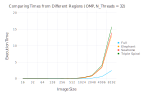

In [173]:
time_dif_regions_omp = Gadfly.plot(layer(@where(omp_full_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line),
            layer(@where(omp_elephant_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"orange")),
            layer(@where(omp_seahorse_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"red")),
            layer(@where(omp_triple_spiral_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"green")),
            Guide.xlabel("Image Size"), Guide.ylabel("Execution Time"), Guide.title("Comparing Times from Different Regions (OMP, N_Threads = 32)"),
            Guide.manual_color_key("",["Full","Elephant","Seahorse","Triple Spiral"],
                            [Gadfly.current_theme().default_color,"orange","red","green"]))

In [203]:
draw(PNG("time_dif_regions_omp.png"), time_dif_regions_omp)

In [ ]:
time_dif_process_full_log = Gadfly.plot(layer(@where(omp_full_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line),
            layer(@where(pth_full_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"orange")),
            layer(seq_full_df,x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"green")),
            Guide.xlabel("Image Size"), Guide.ylabel("Execution Time"), Guide.title("Comparing Times from Different Process (Full Region, N_Threads = 32)"),
            Guide.manual_color_key("",["OpenMP","PThread","Sequential"],
                            [Gadfly.current_theme().default_color,"orange","green"]),
            Scale.y_log10)
draw(PNG("time_dif_process_full_log.png"), time_dif_process_full)

In [208]:
time_dif_process_full_log = Gadfly.plot(layer(@where(omp_full_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line),
            layer(@where(pth_full_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"orange")),
            layer(seq_full_df,x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"green")),
            Guide.xlabel("Image Size"), Guide.ylabel("Execution Time"), Guide.title("Comparing Times from Different Process (Full Region, N_Threads = 32)"),
            Guide.manual_color_key("",["OpenMP","PThread","Sequential"],
                            [Gadfly.current_theme().default_color,"orange","green"]),
            Scale.y_log10)
draw(PNG("time_dif_process_full_log.png"), time_dif_process_full)

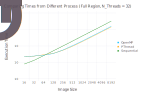

In [209]:
time_dif_process_full_log

In [228]:
first(seq_full_df,4)

,image_size,alloc_write_time,compute_time,full_time,alloc_write_confint
,String,Float64,Float64,Float64,Tuple…
1,16,0.0024464,6.36e-5,0.0025099,"(-0.00284093, 0.00773373)"
2,32,0.0001488,0.0001772,0.000326,"(0.000136647, 0.000160953)"
3,64,0.0003346,0.0006729,0.0010073,"(0.00030316, 0.00036604)"
4,128,0.0009812,0.0025645,0.0035456,"(0.000902742, 0.00105966)"


In [232]:
time_dif_process_full_128 = Gadfly.plot(layer(first(@where(omp_full_df, :n_threads .== "32"),4),x=:image_size,y=:compute_time,Geom.line),
            layer(first(@where(pth_full_df, :n_threads .== "32"),4),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"orange")),
            layer(first(seq_full_df,4),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"green")),
            Guide.xlabel("Image Size"), Guide.ylabel("Execution Time"), Guide.title("Comparing Times from Different Process (Full Region, N_Threads = 32)"),
            Guide.manual_color_key("",["OpenMP","PThread","Sequential"],
                            [Gadfly.current_theme().default_color,"orange","green"]))
draw(PNG("time_dif_process_full_128.png"), time_dif_process_full_128)

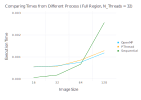

In [233]:
time_dif_process_full_128

In [234]:
time_dif_process_full_512 = Gadfly.plot(layer(first(@where(omp_full_df, :n_threads .== "32"),6),x=:image_size,y=:compute_time,Geom.line),
            layer(first(@where(pth_full_df, :n_threads .== "32"),6),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"orange")),
            layer(first(seq_full_df,6),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"green")),
            Guide.xlabel("Image Size"), Guide.ylabel("Execution Time"), Guide.title("Comparing Times from Different Process (Full Region, N_Threads = 32)"),
            Guide.manual_color_key("",["OpenMP","PThread","Sequential"],
                            [Gadfly.current_theme().default_color,"orange","green"]))
draw(PNG("time_dif_process_full_512.png"), time_dif_process_full_512)

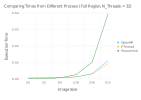

In [235]:
time_dif_process_full_512

In [205]:
time_dif_process_elephant = Gadfly.plot(layer(@where(omp_elephant_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line),
            layer(@where(pth_elephant_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"orange")),
            layer(seq_elephant_df,x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"green")),
            Guide.xlabel("Image Size"), Guide.ylabel("Execution Time"), Guide.title("Comparing Times from Different Process (Elephant Region, N_Threads = 32)"),
            Guide.manual_color_key("",["OpenMP","PThread","Sequential"],
                            [Gadfly.current_theme().default_color,"orange","green"]))
draw(PNG("time_dif_process_elephant.png"), time_dif_process_elephant)

In [ ]:
time_dif_process_elephant = Gadfly.plot(layer(@where(omp_elephant_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line),
            layer(@where(pth_elephant_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"orange")),
            layer(seq_elephant_df,x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"green")),
            Guide.xlabel("Image Size"), Guide.ylabel("Execution Time"), Guide.title("Comparing Times from Different Process (Elephant Region, N_Threads = 32)"),
            Guide.manual_color_key("",["OpenMP","PThread","Sequential"],
                            [Gadfly.current_theme().default_color,"orange","green"]))
draw(PNG("time_dif_process_elephant.png"), time_dif_process_elephant)

In [ ]:
time_dif_process_elephant = Gadfly.plot(layer(@where(omp_elephant_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line),
            layer(@where(pth_elephant_df, :n_threads .== "32"),x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"orange")),
            layer(seq_elephant_df,x=:image_size,y=:compute_time,Geom.line,Theme(default_color=colorant"green")),
            Guide.xlabel("Image Size"), Guide.ylabel("Execution Time"), Guide.title("Comparing Times from Different Process (Elephant Region, N_Threads = 32)"),
            Guide.manual_color_key("",["OpenMP","PThread","Sequential"],
                            [Gadfly.current_theme().default_color,"orange","green"]))
draw(PNG("time_dif_process_elephant.png"), time_dif_process_elephant)

In [241]:
time_dif_thread_elephant = Gadfly.plot(layer(@where(omp_elephant_df, :image_size .== "2048"),x=:n_threads,y=:compute_time,Geom.line),
            layer(@where(pth_elephant_df, :image_size .== "2048"),x=:n_threads,y=:compute_time,Geom.line,Theme(default_color=colorant"orange")),
            Guide.xlabel("Number of Threads"), Guide.ylabel("Execution Time"), Guide.title("Comparing Times by Number of Threads from Different Process\n(Elephant Region, Image_size = 2048*2048)"),
            Guide.manual_color_key("",["OpenMP","PThread"],
                            [Gadfly.current_theme().default_color,"orange"]))
draw(PNG("time_dif_thread_elephant.png"), time_dif_thread_elephant)

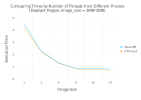

In [242]:
time_dif_thread_elephant.xlabel

In [246]:
@where(pth_elephant_df, :"n_threads" .== "32")

,image_size,n_threads,compute_time,compute_confint,region
,String,String,Float64,Tuple…,String
1,16,32,0.0007994,"(0.000702934, 0.000895866)",Elephant
2,32,32,0.0006664,"(0.000576099, 0.000756701)",Elephant
3,64,32,0.0011735,"(0.00114079, 0.00120621)",Elephant
4,128,32,0.0035181,"(0.00338318, 0.00365302)",Elephant
5,256,32,0.0126943,"(0.0121655, 0.0132231)",Elephant
6,512,32,0.046754,"(0.0460119, 0.0474961)",Elephant
7,1024,32,0.181095,"(0.179514, 0.182676)",Elephant
8,2048,32,0.719075,"(0.71244, 0.725711)",Elephant
9,4096,32,2.87966,"(2.84571, 2.91361)",Elephant


In [252]:
function separateConfidenceInterval(x)
    min_max_interval = collect(zip(x...))
    collect(min_max_interval[1]),collect(min_max_interval[2])
end

separateConfidenceInterval (generic function with 1 method)

In [301]:
function compareRegions(full,elephant,seahorse,triple_spiral,x_variable,title,xlabel,ylabel,label_array,ylog=false)
    min_ci_f, max_ci_f = separateConfidenceInterval(full[!,:compute_confint])
    min_ci_e, max_ci_e = separateConfidenceInterval(elephant[!,:compute_confint])
    min_ci_s, max_ci_s = separateConfidenceInterval(seahorse[!,:compute_confint])
    min_ci_t, max_ci_t = separateConfidenceInterval(triple_spiral[!,:compute_confint])
    if ylog
        plot_regions = Gadfly.plot(layer(full,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_f,ymax=max_ci_f,Geom.line,Geom.errorbar),
            layer(elephant,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_e,ymax=max_ci_e,Geom.line,Geom.errorbar,Theme(default_color=colorant"orange")),
            layer(seahorse,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_s,ymax=max_ci_s,Geom.line,Geom.errorbar,Theme(default_color=colorant"red")),
            layer(triple_spiral,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_t,ymax=max_ci_t,Geom.line,Geom.errorbar,Theme(default_color=colorant"green")),
            Guide.xlabel(xlabel), Guide.ylabel(ylabel), Guide.title(title),
            Guide.manual_color_key("",label_array,
                            [Gadfly.current_theme().default_color,"orange","red","green"]),
            Scale.y_log10)
    else
        plot_regions = Gadfly.plot(layer(full,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_f,ymax=max_ci_f,Geom.line,Geom.errorbar),
            layer(elephant,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_e,ymax=max_ci_e,Geom.line,Geom.errorbar,Theme(default_color=colorant"orange")),
            layer(seahorse,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_s,ymax=max_ci_s,Geom.line,Geom.errorbar,Theme(default_color=colorant"red")),
            layer(triple_spiral,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_t,ymax=max_ci_t,Geom.line,Geom.errorbar,Theme(default_color=colorant"green")),
            Guide.xlabel(xlabel), Guide.ylabel(ylabel), Guide.title(title),
            Guide.manual_color_key("",label_array,
                            [Gadfly.current_theme().default_color,"orange","red","green"]))
    end
    return plot_regions
end


compareRegions (generic function with 3 methods)

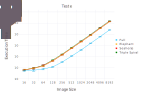

In [302]:
plot_regions = compareRegions(
    @where(omp_full_df, :n_threads .== "32"),
    @where(omp_elephant_df, :n_threads .== "32"),
    @where(omp_seahorse_df, :n_threads .== "32"),
    @where(omp_triple_spiral_df, :n_threads .== "32"),
    "image_size","Teste","Image Size","Execution Time",
    ["Full","Elephant","Seahorse","Triple Spiral"],true
)

In [275]:
full = @where(omp_full_df, :n_threads .== "32")
elephant = @where(omp_elephant_df, :n_threads .== "32")
seahorse = @where(omp_seahorse_df, :n_threads .== "32")
triple_spiral = @where(omp_triple_spiral_df, :n_threads .== "32")
x_variable = "image_size"
title = "Teste"
xlabel = "Image Size"
ylabel = "Execution Time"
label_array = ["Full","Elephant","Seahorse","Triple Spiral"]
ylog = false

false

In [313]:
function compareParallel(omp,pth,x_variable,title,xlabel,ylabel,label_array,ylog=false)
    min_ci_o, max_ci_o = separateConfidenceInterval(omp[!,:compute_confint])
    min_ci_p, max_ci_p = separateConfidenceInterval(pth[!,:compute_confint])
    if ylog
        plot_graph = Gadfly.plot(layer(omp,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_o,ymax=max_ci_o,Geom.line,Geom.errorbar),
            layer(pth,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_p,ymax=max_ci_p,Geom.line,Geom.errorbar,Theme(default_color=colorant"orange")),
            Guide.xlabel(xlabel), Guide.ylabel(ylabel), Guide.title(title),
            Guide.manual_color_key("",label_array,
                            [Gadfly.current_theme().default_color,"orange"]),
            Scale.y_log10)
    else
        plot_graph = Gadfly.plot(layer(omp,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_o,ymax=max_ci_o,Geom.line,Geom.errorbar),
            layer(pth,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_p,ymax=max_ci_p,Geom.line,Geom.errorbar,Theme(default_color=colorant"orange")),
            Guide.xlabel(xlabel), Guide.ylabel(ylabel), Guide.title(title),
            Guide.manual_color_key("",label_array,
                            [Gadfly.current_theme().default_color,"orange"]))
    end
    return plot_graph
end

compareParallel (generic function with 2 methods)

In [304]:
@where(omp_elephant_df, :image_size .== "2048")

,image_size,n_threads,compute_time,compute_confint,region
,String,String,Float64,Tuple…,String
1,2048,1,4.50259,"(4.42584, 4.57934)",Elephant
2,2048,2,2.26054,"(2.21543, 2.30566)",Elephant
3,2048,4,1.29856,"(1.27781, 1.31931)",Elephant
4,2048,8,0.873936,"(0.839258, 0.908615)",Elephant
5,2048,16,0.852014,"(0.827956, 0.876072)",Elephant
6,2048,32,0.805165,"(0.788736, 0.821593)",Elephant


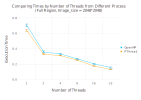

In [326]:
plot_regions = compareParallel(
    @where(omp_full_df, :image_size .== "2048"),
    @where(pth_full_df, :image_size .== "2048"),
    "n_threads",
    "Comparing Times by Number of Threads from Different Process\n(Full Region, Image_size = 2048*2048)",
    "Number of Threads",
    "Execution Time",
    ["OpenMP","PThread"],
    false
)

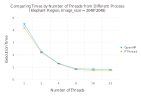

In [325]:
plot_regions = compareParallel(
    @where(omp_elephant_df, :image_size .== "2048"),
    @where(pth_elephant_df, :image_size .== "2048"),
    "n_threads",
    "Comparing Times by Number of Threads from Different Process\n(Elephant Region, Image_size = 2048*2048)",
    "Number of Threads",
    "Execution Time",
    ["OpenMP","PThread"],
    false
)

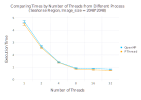

In [324]:
plot_regions = compareParallel(
    @where(omp_seahorse_df, :image_size .== "2048"),
    @where(pth_seahorse_df, :image_size .== "2048"),
    "n_threads",
    "Comparing Times by Number of Threads from Different Process\n(Seahorse Region, Image_size = 2048*2048)",
    "Number of Threads",
    "Execution Time",
    ["OpenMP","PThread"],
    false
)

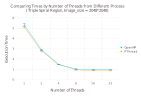

In [327]:
plot_regions = compareParallel(
    @where(omp_triple_spiral_df, :image_size .== "2048"),
    @where(pth_triple_spiral_df, :image_size .== "2048"),
    "n_threads",
    "Comparing Times by Number of Threads from Different Process\n(Triple Spiral Region, Image_size = 2048*2048)",
    "Number of Threads",
    "Execution Time",
    ["OpenMP","PThread"],
    false
)

In [316]:
# omp = @where(omp_full_df, :image_size .== "2048")
# pth = @where(pth_full_df, :image_size .== "2048")
# x_variable = "n_threads"
# title = "Comparing Times by Number of Threads from Different Process\n(Full Region, Image_size = 2048*2048)"
# xlabel = "Number of Threads"
# ylabel = "Execution Time"
# label_array = ["OpenMP","PThread"]
# ylog = false

false

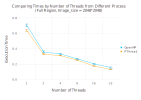

In [318]:
# min_ci_o, max_ci_o = separateConfidenceInterval(omp[!,:compute_confint])
#     min_ci_p, max_ci_p = separateConfidenceInterval(pth[!,:compute_confint])
# plot_graph = Gadfly.plot(layer(omp,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_o,ymax=max_ci_o,Geom.line,Geom.errorbar),
#             layer(pth,x=Symbol(x_variable),y=:compute_time,ymin=min_ci_p,ymax=max_ci_p,Geom.line,Geom.errorbar,Theme(default_color=colorant"orange")),
#             Guide.xlabel(xlabel), Guide.ylabel(ylabel), Guide.title(title),
#             Guide.manual_color_key("",label_array,
#                             [Gadfly.current_theme().default_color,"orange"]))